# Predicting Price for Wholesale and Internet segments
First thing we need to do is predict the average prices in the wholesale and internet segments for North America, Europe Africa, Asia Pacific, and Latin America.

This helps us make more accurate decisions in BSG and identify if we'll hit the shareholder expectations for the period.

In [1]:
#let's grab a few packages for stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Let's set some variables that we'll change each round
#Change this year to the year being predicted (i.e. if you're predicting year 16, enter '16')
predictionYear = 19 

#Load the dataset from our bsg_prices_actual - Sheet1.csv
df = pd.read_csv('bsg_prices_actual - Sheet1.csv')
df

,ID,YEAR,NA_PRICE_INTERNET_INDUSTRY_AVERAGE,NA_PRICE_WHOLESALE_INDUSTRY_AVERAGE,EU_PRICE_INTERNET_INDUSTRY_AVERAGE,EU_PRICE_WHOLESALE_INDUSTRY_AVERAGE,AP_PRICE_INTERNET_INDUSTRY_AVERAGE,AP_PRICE_WHOLESALE_INDUSTRY_AVERAGE,LA_PRICE_INTERNET_INDUSTRY_AVERAGE,LA_PRICE_WHOLESALE_INDUSTRY_AVERAGE
0,4,14,88.14,60.54,98.12,67.63,86.40,60.69,94.86,67.08
1,5,15,93.47,65.66,101.90,71.76,91.30,63.86,94.37,66.34
2,6,16,94.94,66.90,101.21,71.44,90.51,63.28,96.81,68.46
3,7,17,86.32,60.35,97.94,68.88,86.38,60.86,89.28,63.46
4,8,18,87.14,60.82,99.12,68.90,86.91,60.69,92.48,65.33


## Functions
Here we'll create some functions for reuse:
1. Slope Intercept
2. Print Slope as Formula
3. Hypothetical Slope and Intercept from our data
4. Print the Predicted Year using Hypothetical Slope and Intercept

In [2]:
#1. Slope Intercept Function
#Function to find the slope intercept of a first degree polynomial
def getSlope(x,y): #pass in the x value, y value, and a string for printing
    slope, intercept = np.polyfit(x,y,1).round(decimals = 4) #compute the slope
    return slope, intercept

#2. Print Slope as Formulas
#Function to print the slope
def printSlope(x,y,string):
    slope, intercept = np.polyfit(x,y,1).round(decimals = 4)
    printed_string = string + '= ' + str(slope) + 'x + ' + str(intercept)
    return printed_string 

#3. Hypothetical Slope and Intercept from our data
x_theor = np.array([14,predictionYear]) #set x_theor as it will be used in all our Linear Models
def getYTheor(slope, x_theor, intercept): #pass in the slope, x_theor, and intercept
    y_theor = slope * x_theor + intercept
    return y_theor

#4. Print Predicted Year using Hypothetical Slope and Intercept
def printPrediction(slope, intercept, string): 
    prediction = 'Year ' + str(predictionYear) + ' ' + string +' predicted price: ' + str(slope * predictionYear + intercept)
    return prediction


### Find Slope Intercept for each segment

In [3]:
#variable assignments
x = np.array(df['YEAR'])
y_na_internet = np.array(df['NA_PRICE_INTERNET_INDUSTRY_AVERAGE'])
y_na_wholesale = np.array(df['NA_PRICE_WHOLESALE_INDUSTRY_AVERAGE'])
y_eu_internet = np.array(df['EU_PRICE_INTERNET_INDUSTRY_AVERAGE'])
y_eu_wholesale = np.array(df['EU_PRICE_WHOLESALE_INDUSTRY_AVERAGE'])
y_ap_internet = np.array(df['AP_PRICE_INTERNET_INDUSTRY_AVERAGE'])
y_ap_wholesale = np.array(df['AP_PRICE_WHOLESALE_INDUSTRY_AVERAGE'])
y_la_internet = np.array(df['LA_PRICE_INTERNET_INDUSTRY_AVERAGE'])
y_la_wholesale = np.array(df['LA_PRICE_WHOLESALE_INDUSTRY_AVERAGE'])

#print the slope in y=mx+b form
print(printSlope(x,y_na_internet,'NA Internet'))
print(printSlope(x,y_na_wholesale,'NA Wholesale'))
print(printSlope(x,y_eu_internet,'EU Internet'))
print(printSlope(x,y_eu_wholesale,'EU Wholesale'))
print(printSlope(x,y_ap_internet,'AP Internet'))
print(printSlope(x,y_ap_wholesale,'AP Wholesale'))
print(printSlope(x,y_la_internet,'LA Internet'))
print(printSlope(x,y_la_wholesale,'LA Wholesale'))

NA Internet= -0.915x + 104.642
NA Wholesale= -0.475x + 70.454
EU Internet= -0.196x + 102.794
EU Wholesale= -0.034x + 70.266
AP Internet= -0.39x + 94.54
AP Wholesale= -0.3x + 66.676
LA Internet= -0.985x + 109.32
LA Wholesale= -0.638x + 76.342


## North America Internet and Wholesale Pricing
This is in dollars per pair of shoes

Year 19 Internet predicted price: 87.25699999999999
Year 19 Wholesale predicted price: 61.428999999999995


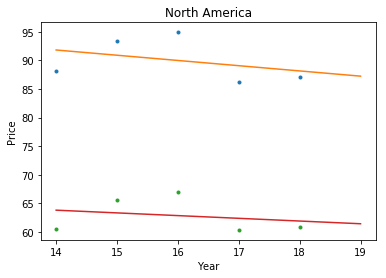

In [4]:
#grab the slope and intercepts for NA Internet and Wholesale segments
na_internet_slope, na_internet_intercept = getSlope(x,y_na_internet)
na_wholesale_slope,na_wholesale_intercept = getSlope(x,y_na_wholesale)

#set the y theoretical for NA Internet and Wholesale
internet_y_theor = getYTheor(na_internet_slope, x_theor, na_internet_intercept)
wholesale_y_theor = getYTheor(na_wholesale_slope,x_theor,na_wholesale_intercept)

#print the predicted price
print(printPrediction(na_internet_slope, na_internet_intercept, 'Internet'))
print(printPrediction(na_wholesale_slope, na_wholesale_intercept, 'Wholesale'))

#plot the anscombe data and theoretical lines
_ = plt.plot(x,y_na_internet,marker='.', linestyle='none')
_ = plt.plot(x_theor,internet_y_theor)
_ = plt.plot(x,y_na_wholesale,marker='.', linestyle='none')
_ = plt.plot(x_theor,wholesale_y_theor)

#label the axes
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('North America')
plt.show()

### Europe Africa Internet and Wholesale Pricing
dollars per pair

Year 19 Internet predicted price: 99.07
Year 19 Wholesale predicted price: 69.62


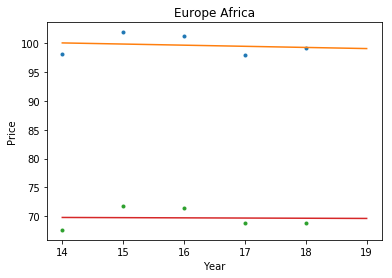

In [5]:
#grab the slope and intercepts for NA Internet and Wholesale segments
eu_internet_slope, eu_internet_intercept = getSlope(x,y_eu_internet)
eu_wholesale_slope,eu_wholesale_intercept = getSlope(x,y_eu_wholesale)

#set the y theoretical for NA Internet and Wholesale
internet_y_theor = getYTheor(eu_internet_slope, x_theor, eu_internet_intercept)
wholesale_y_theor = getYTheor(eu_wholesale_slope,x_theor,eu_wholesale_intercept)

#print the predicted price
print(printPrediction(eu_internet_slope, eu_internet_intercept, 'Internet'))
print(printPrediction(eu_wholesale_slope, eu_wholesale_intercept, 'Wholesale'))

#plot the anscombe data and theoretical lines
_ = plt.plot(x,y_eu_internet,marker='.', linestyle='none')
_ = plt.plot(x_theor,internet_y_theor)
_ = plt.plot(x,y_eu_wholesale,marker='.', linestyle='none')
_ = plt.plot(x_theor,wholesale_y_theor)

#label the axes
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Europe Africa')
plt.show()

### Asia Pacific Internet and Wholesale Pricing
dollars per pair

Year 19 Internet predicted price: 87.13000000000001
Year 19 Wholesale predicted price: 60.976


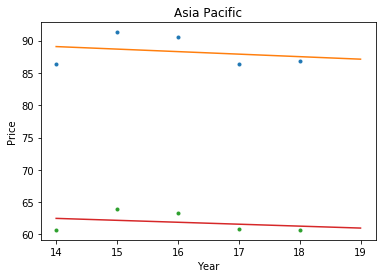

In [6]:
#grab the slope and intercepts for NA Internet and Wholesale segments
ap_internet_slope, ap_internet_intercept = getSlope(x,y_ap_internet)
ap_wholesale_slope,ap_wholesale_intercept = getSlope(x,y_ap_wholesale)

#set the y theoretical for NA Internet and Wholesale
internet_y_theor = getYTheor(ap_internet_slope, x_theor, ap_internet_intercept)
wholesale_y_theor = getYTheor(ap_wholesale_slope,x_theor,ap_wholesale_intercept)

#print the predicted price
print(printPrediction(ap_internet_slope, ap_internet_intercept, 'Internet'))
print(printPrediction(ap_wholesale_slope, ap_wholesale_intercept, 'Wholesale'))

#plot the anscombe data and theoretical lines
_ = plt.plot(x,y_ap_internet,marker='.', linestyle='none')
_ = plt.plot(x_theor,internet_y_theor)
_ = plt.plot(x,y_ap_wholesale,marker='.', linestyle='none')
_ = plt.plot(x_theor,wholesale_y_theor)

#label the axes
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Asia Pacific')
plt.show()

### Latin America Internet and Wholesale Pricing
dollars per pair

Year 19 Internet predicted price: 90.60499999999999
Year 19 Wholesale predicted price: 64.22


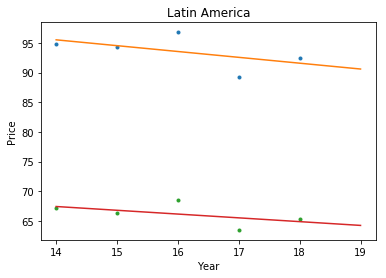

In [7]:
#grab the slope and intercepts for NA Internet and Wholesale segments
la_internet_slope, la_internet_intercept = getSlope(x,y_la_internet)
la_wholesale_slope, la_wholesale_intercept = getSlope(x,y_la_wholesale)

#set the y theoretical for NA Internet and Wholesale
internet_y_theor = getYTheor(la_internet_slope, x_theor, la_internet_intercept)
wholesale_y_theor = getYTheor(la_wholesale_slope,x_theor, la_wholesale_intercept)

#print the predicted price
print(printPrediction(la_internet_slope, la_internet_intercept, 'Internet'))
print(printPrediction(la_wholesale_slope, la_wholesale_intercept, 'Wholesale'))

#plot the anscombe data and theoretical lines
_ = plt.plot(x,y_la_internet,marker='.', linestyle='none')
_ = plt.plot(x_theor,internet_y_theor)
_ = plt.plot(x,y_la_wholesale,marker='.', linestyle='none')
_ = plt.plot(x_theor,wholesale_y_theor)

#label the axes
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Latin America')
plt.show()